# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product promotions.For that they collected data and decided to carry out a study on it. 

● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

● The company needs to check whether there is any dependency between the features “Region” and “Manager”. 

Help the company to carry out their study with the help of data provided

## Importing the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Reading the dataset to the python environment

In [2]:
data= pd.read_csv('Sales_add.csv')

### Preprocessing

In [3]:
data.head()
##checking whether the dataset is loaded properly

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


The given dataset is loaded properly

In [4]:
data.shape
##checking the shape of the dataset

(22, 5)

The given dataset consist of 22 rows and 5 columns

In [5]:
data.info()
##to get the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


it consist of 2 integer datatype columns and 3 object type datatype column

In [6]:
data.isna().sum()
##Checking for any null values present in the dataset 

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

There are no null values present in the dataset

In [7]:
data.describe()
##Checking the statistics of columns

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


It is clear from the mean values that there has been an increase in sales after the addition of digital marketing

<AxesSubplot:>

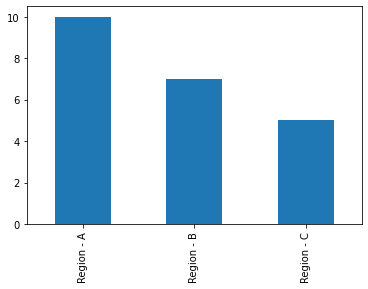

In [8]:
data['Region'].value_counts().plot.bar()
##counts of different regions with sales data given plotted in a bar graph

<AxesSubplot:>

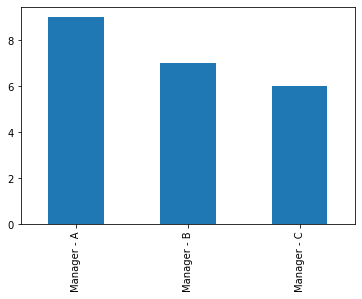

In [9]:
data['Manager'].value_counts().plot.bar()
##counts of the different managers with sales data given plotted in a bar graph

### Box plots for sales data variation

<AxesSubplot:xlabel='Sales_After_digital_add(in $)'>

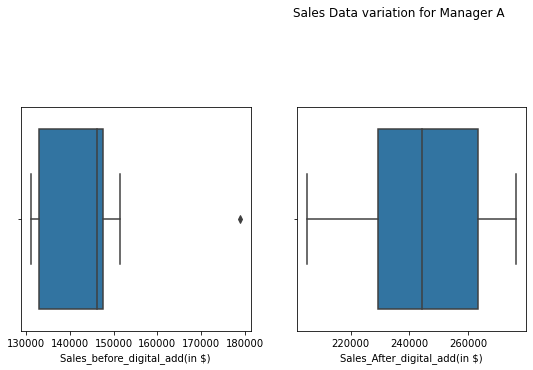

In [22]:
plt.figure(figsize=(14,14))
plt.suptitle('Sales Data variation for Manager A')
plt.subplot(3,3,1)
sns.boxplot(data['Sales_before_digital_add(in $)'][data['Manager']=='Manager - A'])

plt.subplot(3,3,2)
sns.boxplot(data['Sales_After_digital_add(in $)'][data['Manager']=='Manager - A'])

<AxesSubplot:xlabel='Sales_After_digital_add(in $)'>

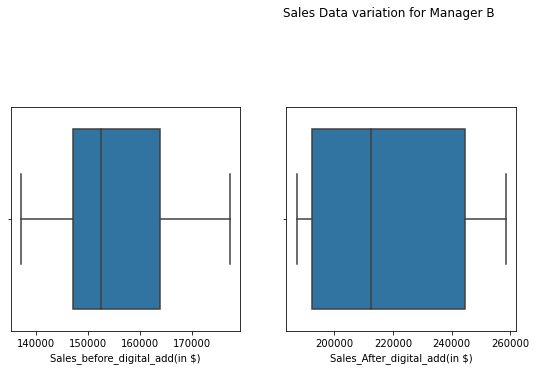

In [23]:
plt.figure(figsize=(14,14))
plt.suptitle('Sales Data variation for Manager B')
plt.subplot(3,3,1)
sns.boxplot(data['Sales_before_digital_add(in $)'][data['Manager']=='Manager - B'])

plt.subplot(3,3,2)
sns.boxplot(data['Sales_After_digital_add(in $)'][data['Manager']=='Manager - B'])

<AxesSubplot:xlabel='Sales_After_digital_add(in $)'>

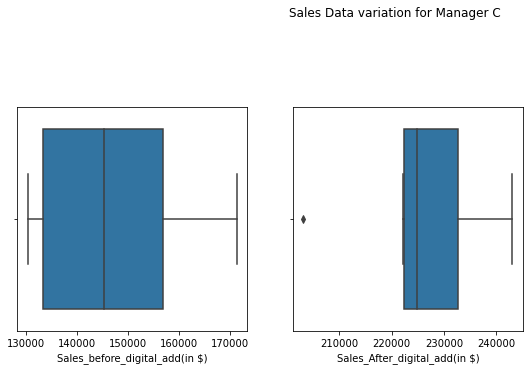

In [24]:
plt.figure(figsize=(14,14))
plt.suptitle('Sales Data variation for Manager C')
plt.subplot(3,3,1)
sns.boxplot(data['Sales_before_digital_add(in $)'][data['Manager']=='Manager - C'])

plt.subplot(3,3,2)
sns.boxplot(data['Sales_After_digital_add(in $)'][data['Manager']=='Manager - C'])

**It is clear from the box plots that all the managers had an increase in the sales after adding digital marketting**

# 1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing. 

It is already clear from the box plots that there is an increase in sales after stepping into digital marketting.
Here we are using hypothesis testing to prove the same

**H0 : There is no increase in sales after digital marketing**


**H1 : There is an increase in sales after stepping into digital marketing**

In [25]:
from scipy import stats
tvalue,pvalue=stats.ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])
print('P value is %0.12f'%pvalue)

P value is 0.000000000063


**Here since the P value is <0.05 we can reject the null hypothesis and say there is an increase in sales with digital marketing**

# 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [26]:
##Here we are using chi-squared test for independence to check for the dependency between region and manager

**H0 :There is no dependency between "Region" and "Manager"**

**H1 :There is dependency between "Region" and "Manager"**

In [27]:
##Here inorder to get a contingency table of region and manager features we are using the crosstab() function.
cont_tab=pd.crosstab(data['Region'],data['Manager'])
cont_tab


Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [32]:
stat,p_value,dof,exp=stats.chi2_contingency(cont_tab)
## getting the test statistic,pvalue,degree of freedom value and expected values

print('Test statistic is:',stat)
print('P value =',p_value)
print('Degree of freedom =',dof)
print('Expected values:',exp)

Test statistic is: 3.050566893424036
P value = 0.5493991051158094
Degree of freedom = 4
Expected values: [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


**Here since the p value is >0.05, the null hypothesis is considered and we could say that there is no dependency between the features "Region" and "Manager"**